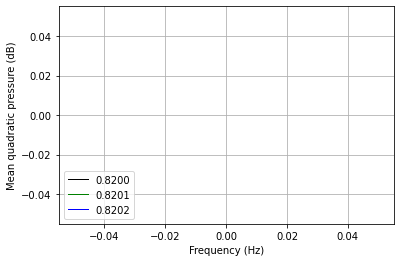

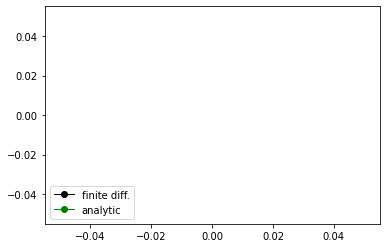

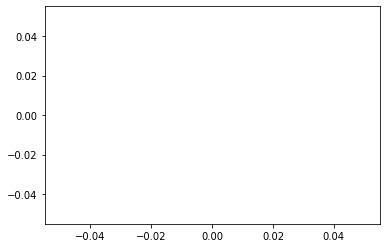

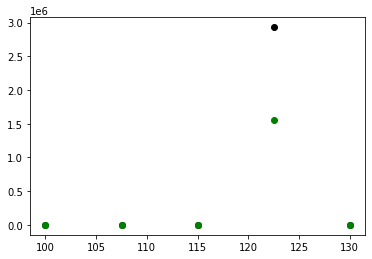

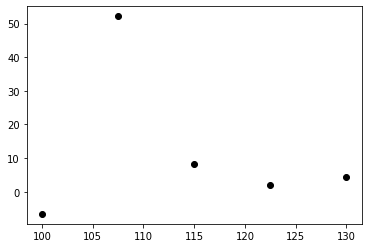

In [3]:
from numpy import *
import string
import time
import os
import pylab as pl
import pickle

f=open('results/xfem3_8200_results.frf','rb')
frf_1=pickle.load(f)
f.close()

f=open('results/xfem3_8201_results.frf','rb')
frf_2=pickle.load(f)
f.close()

f=open('results/xfem3_8202_results.frf','rb')
frf_3=pickle.load(f)
f.close()

#id_node=7
#id_freq=20
#print('freq=',frf_6200[0][id_freq])
#press_node_6200=frf_6200[3][id_freq][id_node]
#press_node_6202=frf_6202[3][id_freq][id_node]
#dpress_node_diff=(press_node_6202-press_node_6200)/(0.6202-0.6200)
#dpress_node_gradient=frf_6201[4][id_freq][id_node]

prefsquare=20e-6*20e-6

Dp_Dtheta_diff = (frf_3[1]-frf_1[1])/(0.8202-0.8200)
Dp_Dtheta_grad = frf_2[2]

pl.figure(1)
pl.plot(frf_1[0],10*log10(frf_1[1]/prefsquare),'k-',label='0.8200', linewidth=1)
pl.plot(frf_2[0],10*log10(frf_2[1]/prefsquare),'g-',label='0.8201', linewidth=1)
pl.plot(frf_3[0],10*log10(frf_3[1]/prefsquare),'b-',label='0.8202', linewidth=1)
#pl.axis([100.0, 300.0, 70, 130])
pl.xlabel('Frequency (Hz)')
pl.ylabel('Mean quadratic pressure (dB)')
pl.grid('on')
pl.legend(loc=3)

pl.figure(2)
pl.plot(frf_2[0],Dp_Dtheta_diff,'ok-',label='finite diff.', linewidth=1)
pl.plot(frf_2[0],Dp_Dtheta_grad,'og-',label='analytic', linewidth=1)
pl.legend(loc=3)

pl.figure(4)
pl.plot(frf_2[0],Dp_Dtheta_diff/Dp_Dtheta_grad,'ok-',label='finite diff./analytic', linewidth=1)


pl.figure(3)
for id_freq in range(len(frf_1[0])):
    id_node=5
    #print('freq=',frf_6200[0][id_freq])
    press_node_1=frf_1[3][id_freq][id_node-1]
    press_node_3=frf_3[3][id_freq][id_node-1]
    #print(press_node_1,press_node_3)
    dpress_node_diff=(press_node_3-press_node_1)/(0.8202-0.8200)
    dpress_node_gradient=frf_2[4][id_freq][id_node-1]
    pl.plot(frf_2[0][id_freq],dpress_node_diff,'ok')
    pl.plot(frf_2[0][id_freq],dpress_node_gradient,'og')
#pl.axis([100.0, 200.0, -1, 10])

pl.figure(5)
for id_freq in range(len(frf_1[0])):
    id_node=5
    #print('freq=',frf_6200[0][id_freq])
    press_node_1=frf_1[3][id_freq][id_node-1]
    press_node_3=frf_3[3][id_freq][id_node-1]
    dpress_node_diff=(press_node_3-press_node_1)/(0.8202-0.8200)
    dpress_node_gradient=frf_2[4][id_freq][id_node-1]
    pl.plot(frf_2[0][id_freq],dpress_node_diff/dpress_node_gradient,'ok')
    #pl.plot(frf_2[0][id_freq],dpress_node_gradient,'og')

pl.show()

In [4]:
Dp_Dtheta_diff

array([nan, nan, nan, nan, nan])

In [6]:
frf_2


[array([100. , 107.5, 115. , 122.5, 130. ]),
 array([nan, nan, nan, nan, nan]),
 array([nan, nan, nan, nan, nan]),
 [array([ 1.        , -5.2138772 , -0.42428216,  1.        ,  1.20817551,
          1.38416415,  1.52510857,  1.63462771,  1.71624223,  1.77096329,
          1.8017068 ,  1.81723564, -5.20007071, -5.11358815, -4.85721253,
         -4.43831127, -3.87031439, -3.15368736, -2.26985759, -1.39068141,
         -0.79031949, -0.50523714, -0.33389876, -0.10598114,  0.19513267,
          0.48803471,  0.72820673,  0.90366449,  1.0126123 ,  1.05880947,
          1.05089687,  1.        ,  1.        ,  1.        ,  1.        ,
          1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
          1.30434928,  0.30137704,  1.12749263,  1.63176065,  1.43306366,
          0.84461499,  1.24749607,  1.30661612,  1.64295686, -0.30799598,
          1.08441619, -4.95630244,  1.32107437,  0.4062965 ,  1.13762315,
          0.99537286, -2.39097829, -4.12613238,  1.24185489,  1.5669013